# 1. 데이터 정의
- 미국인구 수입을 측정해보자

# 2. 데이터 수집
- train, test, sample_submission

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns # 시각화 라이브러리
import warnings # 경고창 없애기

warnings.filterwarnings('ignore')

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [530]:
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [531]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [532]:
train[['income']]

,income
0,0
1,0
2,0
3,0
4,1
...,...
29300,0
29301,0
29302,0
29303,0


In [533]:
train['income'].value_counts()

0    22260
1     7045
Name: income, dtype: int64

In [534]:
capital_train = train.drop(['no','age','workclass','fnlwgt','education','education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country'], axis = 1)

In [535]:
capital_test = test.drop(['no','age','workclass','fnlwgt','education','education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country'], axis = 1)

In [536]:
X_train = capital_train[['capital-gain','capital-loss']]

In [537]:
y_train = capital_train[['income']]

In [538]:
X_test = capital_test[['capital-gain','capital-loss']]

# 모델 적용

In [539]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [540]:
X_train.shape, y_train.shape, X_test.shape

((29305, 2), (29305, 1), (19537, 2))

In [541]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [542]:
knn_pre = knn_model.predict(X_test)

In [543]:
knn_model.score(X_train, y_train)

0.8294488995052038

In [544]:
page = pd.read_csv('./sample_submission.csv')
page['income'] = knn_pre
page.to_csv('mySubmission03.csv', index = False)

# 모델 적용

In [545]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 6)

In [546]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(29305, 2)
(19537, 2)
(29305, 1)


In [547]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [548]:
tree_model.score(X_train, y_train)

0.8259000170619348

In [549]:
tree_pre = tree_model.predict(X_test)

In [550]:
page = pd.read_csv('./sample_submission.csv')
page['income'] = tree_pre
page.to_csv('mySubmission02.csv', index = False)

In [551]:
from sklearn.tree import export_graphviz
# .dot 파일로 export 해줍니다
export_graphviz(tree_model, out_file='tree.dot', filled=True, impurity=False)

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

!pip install graphviz

import graphviz

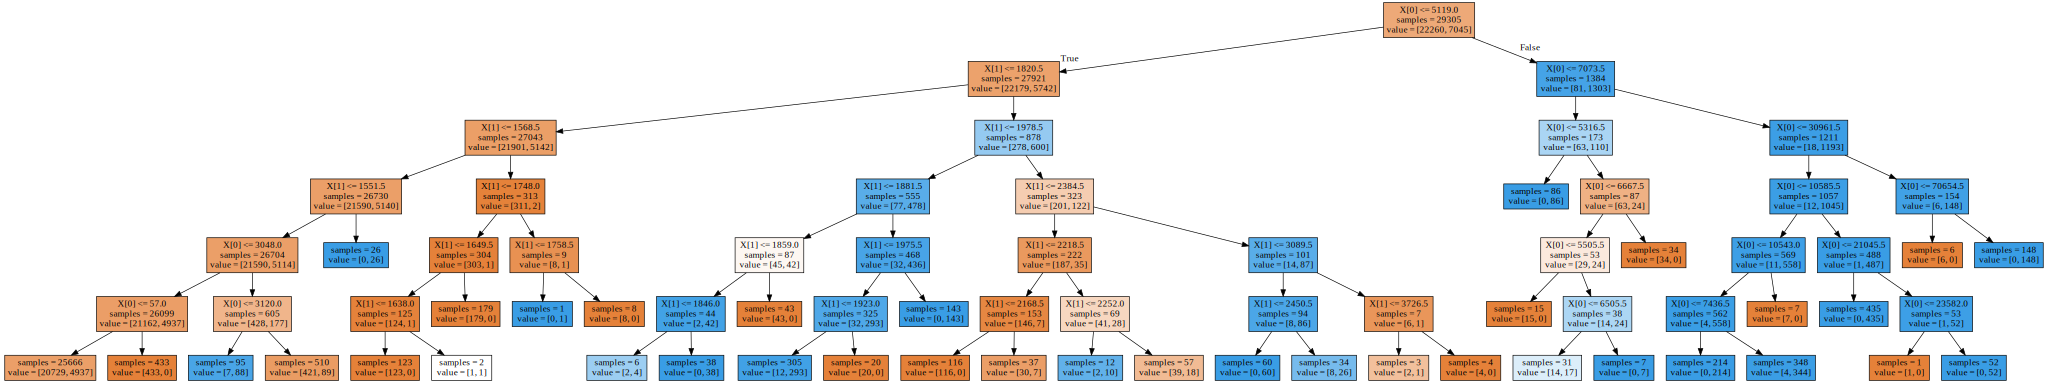

In [552]:
with open("tree.dot") as f :

    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# 모델 적용

In [553]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [554]:
X_train.shape, X_val.shape

((21978, 2), (7327, 2))

In [555]:
import matplotlib.pyplot as plt

In [556]:
train_score_list = []
val_score_list = []

for md in range(1,50) : # 트리 모델이 단순 -> 복잡
    t_model = DecisionTreeClassifier(max_depth=md)
    t_model.fit(X_train,y_train)
    
    train_score = t_model.score(X_train,y_train)
    val_score = t_model.score(X_val,y_val)
    
    train_score_list.append(train_score)
    val_score_list.append(val_score)

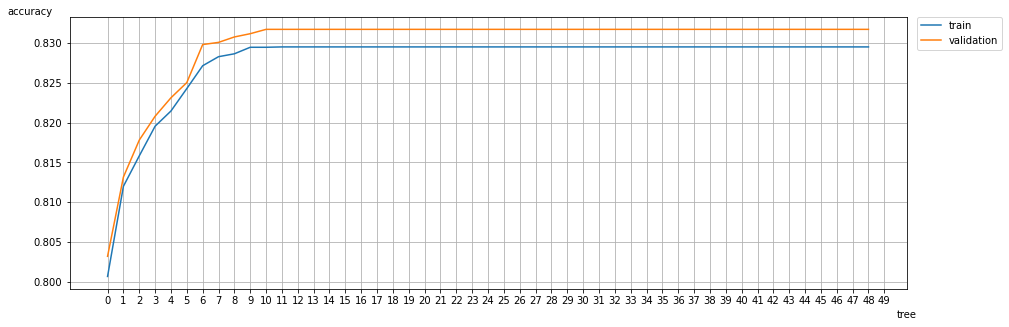

In [557]:
plt.figure(figsize=(15,5)) # 가로,세로
plt.plot(train_score_list,label='train')
plt.plot(val_score_list,label='validation')
plt.xticks(range(0,50))
plt.legend(loc = "upper right", bbox_to_anchor = (1.12,1.02)) # 범례
plt.xlabel('tree', position =(1,0))
plt.ylabel('accuracy', rotation = 0, position = (1,1))
plt.grid()
plt.show()

In [558]:
X_train = pd.concat([X_train, X_val])

y_train = pd.concat([y_train, y_val])

In [559]:
final_tree = DecisionTreeClassifier(max_depth = 6)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [560]:
final_pre = final_tree.predict(X_test)

In [561]:
final_tree.score(X_train, y_train)

0.8259000170619348

In [562]:
page = pd.read_csv('./sample_submission.csv')
page['income'] = final_pre
page.to_csv('mySubmission01.csv', index = False)

# 모델 적용

In [563]:
from sklearn.model_selection import cross_val_score
final_tree = DecisionTreeClassifier(max_depth = 6)

In [564]:
cross_val_score(final_tree, X_train, y_train, cv = 2). mean()

0.8244327102581385

In [565]:
for md in range(1,50):
    t_model = DecisionTreeClassifier(max_depth = md)
    t_model.fit(X_train, y_train)
    
    result = cross_val_score(t_model, X_train, y_train, cv = 5)
    print('max_depth :',md,'score :', result.mean())

max_depth : 1 score : 0.8012967070465791
max_depth : 2 score : 0.8122845930728546
max_depth : 3 score : 0.8163112096911789
max_depth : 4 score : 0.8194506056986862
max_depth : 5 score : 0.821736904965023
max_depth : 6 score : 0.8247398054939431
max_depth : 7 score : 0.8267189899334586
max_depth : 8 score : 0.8284251834157992
max_depth : 9 score : 0.8286299266336803
max_depth : 10 score : 0.8292100324176761
max_depth : 11 score : 0.8294488995052038
max_depth : 12 score : 0.8296877665927316
max_depth : 13 score : 0.8296877665927316
max_depth : 14 score : 0.8296877665927316
max_depth : 15 score : 0.8296877665927316
max_depth : 16 score : 0.8296877665927316
max_depth : 17 score : 0.8296877665927316
max_depth : 18 score : 0.8296877665927316
max_depth : 19 score : 0.8296877665927316
max_depth : 20 score : 0.8296877665927316
max_depth : 21 score : 0.8296877665927316
max_depth : 22 score : 0.8296877665927316
max_depth : 23 score : 0.8296877665927316
max_depth : 24 score : 0.8296877665927316
ma

In [566]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [567]:
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

In [568]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [569]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [570]:
pre = gb_model.predict(X_test)

In [571]:
page = pd.read_csv('./sample_submission.csv')
page['income'] = pre

In [572]:
cross_val_score(rf_model, X_train,y_train,cv=5).mean()

0.829619518853438

In [573]:
cross_val_score(gb_model, X_train, y_train, cv=5).mean()

0.8277427060228628

# 모델 적용